# <span style=color:red> Python Project for Data Science </span >

### Project Overview: For this project, you will assume the role of a Data Scientist / Data Analyst working for a new startup investment firm that helps customers invest their money in stocks.  Your job is to extract financial data like historical share price and quarterly revenue reportings from various sources using Python libraries and webscraping on popular stocks. After collecting this data you will visualize it in a dashboard to identify patterns or trends. The stocks we will work with are Tesla, Amazon, AMD, and GameStop.

##### An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases, ;the investor with incur a loss.  Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more. People trade stocks throughout the day. The stock ticker is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges. In this lab, you will use the  y-finance API to obtain the stock ticker and extract information about the stock. You will then be asked questions about your results.  

## Extracting Stock Data Using a Python Library
##### You are a data scientist working for a hedge fund; it's your job to determine any suspicious stock activity. In this lab you will extract stock data using a Python library. We will use the yfinance library, it allows us to extract data for stocks returning data in a pandas dataframe. You will use the lab to extract.


In [12]:
!pip install yfinance #Provide extracting financial data Yahoo Finance
!pip install pandas
!pip install matplotlib  #for graphs.

In [29]:
import yfinance as yf
import pandas as pd
import matplotlib_inline

In [31]:
applestock = yf.Ticker("AAPL")   #Apple stock name
#Apple'ın hisse senedini temsil eden bir Ticker nesnesi oluşturur. 
#Bu nesne üzerinden Apple'ın finansal verilerine ve diğer ilgili verilere erişebilirsiniz.

### Now we can access functions and variables to extract the type of data we need. You can view them and what they represent here https://aroussi.com/post/python-yahoo-finance.

In [34]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
#wget komutunu çalıştırmışsınız ve başarılı bir şekilde dosyayı indirmişsiniz. 
#Çıktı, apple.json dosyasının başarıyla indirildiğini ve 5.6 KB boyutunda olduğunu gösteriyor.

--2024-08-12 19:54:35--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5699 (5,6K) [application/json]
Saving to: 'apple.json.1'

     0K .....                                                 100%  415M=0s

2024-08-12 19:54:37 (415 MB/s) - 'apple.json.1' saved [5699/5699]



In [36]:
#Using the attribute info we can extract information about the stock as a Python dictionary.

import json

#apple.json is example data
with open('apple.json') as json_file: # apple.json adlı dosyayı okuma modunda açar ve dosyayı json_file adında bir değişkende referans olarak saklar. with ifadesi, dosya işlemlerinde otomatik olarak dosyayı kapatmak için kullanılır. Bu, dosya işlemlerinin güvenli ve yönetilebilir olmasını sağlar.
    apple_info = json.load(json_file) #json.load() fonksiyonu JSON dosyasındaki verileri okur ve Python veri yapısına çevirir.
    

print("Type:", type(apple_info))   #Data type is dictionary
apple_info 

Type: <class 'dict'>


{'zip': '95014',
 'sector': 'Technology',
 'fullTimeEmployees': 100000,
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience wit

In [40]:
#We can get the 'country' using the key country

apple_info['country']

#apple_info['country'] ifadesi, JSON verisinde country anahtarını kullanarak bu anahtarın değerini almayı amaçlar. 

'United States'

### Extracting Share Price  
##### Using the history() method we can get the share price of the stock over a certain period of time. Using the period parameter we can set how far back from the present to get data. The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.


In [46]:
apple_share_price_data = apple.history(period="max")

# . "max" seçeneği, verilerin mevcut tarihten itibaren en eski verilere kadar çekilmesini sağlar.

In [48]:
apple_share_price_data.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086999,0.086999,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.0,0.0


In [56]:
# DF'deki ilk sütun index'i Date !

apple_share_price_data.reset_index(inplace=True) #DataFrame'deki mevcut indeksin sıfırlanmasını sağlar ve Date sütununu standart bir sütun olarak geri ekler.

#Bu durumda, Date artık bir sütun olarak yer alır ve eski indeks sütunu olarak index adında yeni bir sütun eklenir. DataFrame'in indeksi sıfırlanmış olur.

In [54]:
apple_share_price_data.head()

,index,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,0,1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.0,0.0
1,1,1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.0,0.0
2,2,1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086999,0.086999,105728000,0.0,0.0
3,3,1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.0,0.0
4,4,1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.0,0.0


<class 'pandas.core.frame.DataFrame'>


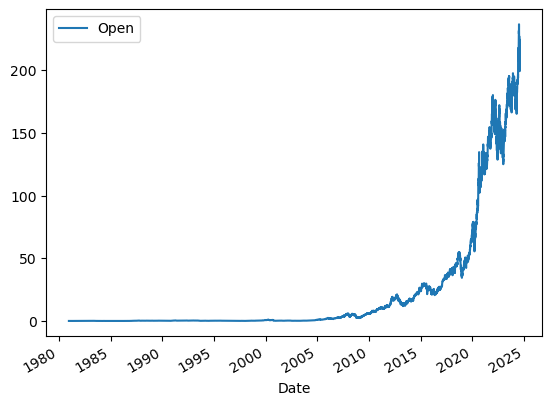

In [72]:
apple_share_price_data.plot(x="Date", y="Open") #We can plot the Open price against the Date:
# x eksenine date değişkenlerini, y değişkenine open değişkenini atayarak .plot() fonksioyun ile grafiğini çizebiliriz !
print(type(apple_share_price_data)) #Data frame için x ve y değişkenleri belirlendi

### Extracting Dividends
##### In this case they are defined as an amount of money returned per share an investor owns. Using the variable dividends we can get a dataframe of the data. The period of the data is given by the period defined in the 'history` function.

In [70]:
apple.dividends
#Bu satır, apple Ticker nesnesi üzerinden Apple'ın tarihsel temettü verilerini içeren bir Pandas DataFrame döndürür.
print(type(apple.dividends)) #series değeri y eksenidir !

<class 'pandas.core.series.Series'>


<Axes: xlabel='Date'>

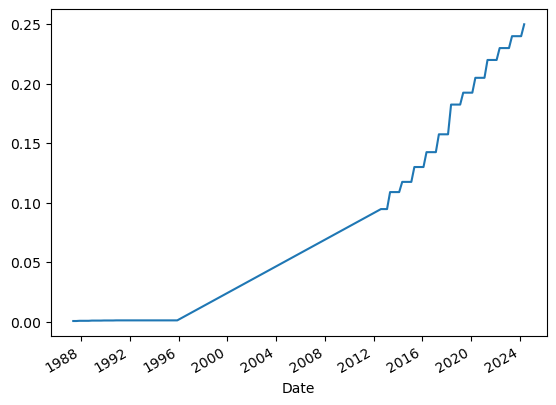

In [66]:
apple.dividends.plot()

#Pandas Series: apple.dividends örneğinde olduğu gibi, Pandas Series'in indeksleri genellikle bir zaman serisi olduğunda, 
#plot() fonksiyonu bu indeksleri otomatik olarak x ekseni olarak alır. 
#Series'in değerleri ise y eksenini oluşturur.

# Exercise PART !

In [108]:
# Now using the Ticker module create an object for AMD (Advanced Micro Devices) with the ticker symbol is AMD called; name the object amd.
import yfinance as yf

# AMD hisse senedi için Ticker nesnesi oluşturuyoruz
amd = yf.Ticker("AMD")



!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
#wget ile indirme, daha fazla kontrol ve otomasyon sağlar, komut satırı araçları ile yapılır ve genellikle daha gelişmiş seçenekler sunar.



#Bu adımda, AMD şirketine ait hisse senedi verilerini incelemek için bir Ticker nesnesi oluşturduk
#ve AMD hisse senedi ile ilgili JSON formatında örnek bir veri dosyasını indirdik. 
#Bu nesne ve dosya, ilerleyen adımlarda finansal analiz ve veri işleme için kullanılacaktır.

--2024-08-12 20:42:41--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5838 (5,7K) [application/json]
Saving to: 'amd.json.3'

     0K .....                                                 100%  884M=0s

2024-08-12 20:42:42 (884 MB/s) - 'amd.json.3' saved [5838/5838]



In [85]:
import json
with open('amd.json') as json_file:
    amd_info = json.load(json_file)
    
# Print the type of data variable    
print("Type:", type(apple_info))
amd_info

Type: <class 'dict'>


{'zip': '95054',
 'sector': 'Technology',
 'fullTimeEmployees': 15500,
 'longBusinessSummary': 'Advanced Micro Devices, Inc. operates as a semiconductor company worldwide. The company operates in two segments, Computing and Graphics; and Enterprise, Embedded and Semi-Custom. Its products include x86 microprocessors as an accelerated processing unit, chipsets, discrete and integrated graphics processing units (GPUs), data center and professional GPUs, and development services; and server and embedded processors, and semi-custom System-on-Chip (SoC) products, development services, and technology for game consoles. The company provides processors for desktop and notebook personal computers under the AMD Ryzen, AMD Ryzen PRO, Ryzen Threadripper, Ryzen Threadripper PRO, AMD Athlon, AMD Athlon PRO, AMD FX, AMD A-Series, and AMD PRO A-Series processors brands; discrete GPUs for desktop and notebook PCs under the AMD Radeon graphics, AMD Embedded Radeon graphics brands; and professional graphi

In [99]:
# AMD hisse senedi verilerini elde etme
amd_share_price_data = amd.history(period="max")

# Verinin ilk birkaç satırını inceleyelim
print(amd_share_price_data.head())

# İlk satırdaki 'Volume' sütununu elde etme
first_day_volume = amd_share_price_data.iloc[0]['Volume']
print("Volume on the first day:", first_day_volume)



                           Open      High       Low     Close  Volume  \
Date                                                                    
1980-03-17 00:00:00-05:00   0.0  3.302083  3.125000  3.145833  219600   
1980-03-18 00:00:00-05:00   0.0  3.125000  2.937500  3.031250  727200   
1980-03-19 00:00:00-05:00   0.0  3.083333  3.020833  3.041667  295200   
1980-03-20 00:00:00-05:00   0.0  3.062500  3.010417  3.010417  159600   
1980-03-21 00:00:00-05:00   0.0  3.020833  2.906250  2.916667  130800   

                           Dividends  Stock Splits  
Date                                                
1980-03-17 00:00:00-05:00        0.0           0.0  
1980-03-18 00:00:00-05:00        0.0           0.0  
1980-03-19 00:00:00-05:00        0.0           0.0  
1980-03-20 00:00:00-05:00        0.0           0.0  
1980-03-21 00:00:00-05:00        0.0           0.0  
Volume on the first day: 219600.0


In [102]:
# 'sector' anahtarını kullanarak sektörü bulalım
sector = amd_info['sector']
print("Sector:", sector)


Sector: Technology


In [106]:
# 'country' anahtarını kullanarak ülkeyi bulalım
country = amd_info['country']
print("Country:", country)


Country: United States
